# Лабораторная работа 5. Цифровые фильтры

В данной лабораторной работе мы:
* узнаем, что такое фильтры и для чего они нужны;
* реализуем собственные фильтры;
* оценим полученный результат.

## Задание 0 Заполнить данные в окне ниже
(для этого необходимо кликнуть два раза на текст ниже)

ФИО студентов: Лисовский Кирилл Алексеевич Никитенко Андрей Михайлович Уксусников Николай Алексеевич Савин Михаил Валерьевич Степаненко Дмитрий Владимирович (как пример, номер студ. билета 09106106)

Группа: РИМ-111060 Подгруппа задания: 3

## Подключить необходимые библиотеки

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.fftpack import fft, ifft, fftshift
import scipy as sp
from scipy import signal

%matplotlib inline

## Теория
В предыдущих работах было изучено, что такое сигнал. Научились представлять сигнал в 4 видах. В данной работе мы научимся выполнять оконные фильтрации.

**Цифровой фильтр** — в электронике любой фильтр, обрабатывающий цифровой сигнал с целью выделения и/или подавления определённых частот этого сигнала. В отличие от цифрового, аналоговый фильтр имеет дело с аналоговым сигналом, его свойства недискретны, соответственно передаточная функция зависит от внутренних свойств составляющих его элементов.

Цифровые фильтры имеют импульсную характеристику. Она в свою очередь может быть бесконечной и конечной. Подробно с этим материалоом мы с вами познакомимся далее в работах.

На сегодняшний день цифровые фильтры применяются практически везде, где требуется обработка сигналов. Даже примитивные математические операции (умножение и сложение) можно представить в виде цифрового фильтра. Следовательно, всё устройства, которые нас окружают (компьютеры, телефоны, телевизоры, и т.д.) содержат ряд тех или иных цифровых фильтров. Например, в телевизорах используются фильтры для преобразования выводимого изображения. Настройка яркости - по сути фильтрация изображения.  
Таким образом, цифровые фильтры применяются в широком спектре задач обработки сигналов: спектральный анализ, обработка аудио- и видео-данных, обработка речи, движения и т.д. Применительно к задачам ЦОС, фильтр - это некоторая математическая система, которая изменяет форму входного сигнала (амплитуду, фазу, частоту).

**Преимущества цифровых фильтров**:

- Возможность получения характеристик, которые невозможно получить аналоговыми методами (например, точную линейную ФЧХ).
- Цифровые фильтры стабильнее к внешним изменениями среды (температура, влажность, давление). Следовательно, цифровые фильтры не требуют постоянной калибровки.
- Простота перестройки частоты обработки сигнала.
- В зависимости от скорости обработки и частоты сигнала, один фильтр может одновременно обрабатывать данные с нескольких каналов.
- Данные до и после фильтра можно сохранить на любой носитель. Аналоговые сигналы записать сложнее (в любом случае требуется перевод в цифровую форму и обратно).
- Низкая потребляемая мощность и низкая стоимость относительно аналоговых фильтров.
- Повышенная точность вычисления (современные цифровые устройства не ограничены в точности вычисления).
- Простота проектирования фильтров со сложными частотными характеристиками.
- В задачах биомедицины применение аналоговых фильтров на очень низких частотах затруднительно, в отличие от цифровых фильтров.

**Недостатки цифровых фильтров**

- **Ограниченная разрядность**. В процессе вычисления в цифровых фильтрах с конечной разрядностью накапливаются шумы квантования, шумы округления. Одна из типовых задач ЦОС - выбор подходящей разрядность фильтра.
- **Ограничение скорости обработки**. Как правило, аналоговые фильтры способны обрабатывать данные на очень больших частотах. Цифровые фильтры ограничены частотой дискретизации.
- **Аппаратное обеспечение**. Поскольку реальные сигналы в природе - непрерывные, для их обработки используются АЦП и ЦАП. От характеристик этих устройств также зависит качество получаемых цифровых (аналоговых) сигналов.



### БИХ и КИХ фильтры

**КИХ фильтр** (англ. FIR — «finite impulse response») - это цифровой фильтр с конечной импульсной характеристикой. Импульсная характеристика такого фильтра ограничена во времени, то есть имеет счётное число коэффициентов. Начиная с определенного момента времени она становится равной нулю. Если на вход КИХ-фильтра подать единичный импульс, на выходе фильтра будет конечное число отсчетов. Как правило, ФЧХ фильтра с конечной импульсной характеристикой - линейна

В общем случае, КИХ-фильтры реализуются без обратных связей, то есть они нерекурсивные. Однако, с помощью математических преобразований можно привести фильтр к рекурсивной форме.

Разностное уравнение КИХ-фильтра:

$ y(n) = \sum_{k=0}^{N-1}h(k)x(n-k) $

где  

- $ y(n) $ - выходной дискретный сигнал (сумма взвешенных входных импульсов),
- $ x(n) $ - входной дискретный сигнал (последовательность отсчётов),
- $ h(n) $ - коэффициенты импульсной характеристики фильтра,
- $ N $ - длина (порядок) фильтра.

Передаточная характеристика КИХ-фильтра:

$ H(z) = \sum_{k=0}^{N-1}h(k)z^{-k} $

Напомним, что операция $z^{-k}$ - задержка последовательности на k-отсчетов.

**БИХ фильтр** (англ. IIR — «infinite impulse response») - это цифровой фильтр с бесконечной во времени импульсной характеристикой, то есть имеет очень большое или бесконечное число коэффициентов. БИХ фильтры также называют рекурсивными в связи с тем, что при их реализации используются обратные связи (сигнал с выхода фильтра через элементы задержки поступает на фильтр и вносит изменения сам в себя). Передаточная функция БИХ-фильтра имеет дробно-рациональный вид. Основные известные БИХ-фильтры: фильтр Чебышева, Баттерворта, Калмана, Бесселя и т.д.

Разностное уравнение БИХ-фильтра:

$ y(n) = \sum_{k=0}^{N}b_{k}x(n-k) - \sum_{k=1}^{M}a_{k}y(n-k)$

или

$ y(n) = b_{0}x(n) + b_{1}x(n-1) + b_{M}x(n-M) + ... - a_{1}y(n-1) - a_{2}y(n-2) - ... - a_{N}y(n-N)$

Как видно, выходной сигнал за счет обратных связей влияет сам на себя.

Передаточная характеристика БИХ-фильтра:

$ H(z) = \frac{B(z)}{A(z)} = \frac{b_0 + b_{1}z^{-1} + ... + b_{N}z^{-N}}{1 + a_{1}z^{-1} + ... + a_{M}z^{-M}}$  

**Фильтр нижних частот** (ФНЧ) — электронный или любой другой фильтр, эффективно пропускающий частотный спектр сигнала ниже некоторой частоты (частоты среза) и подавляющий частоты сигнала выше этой частоты. Степень подавления каждой частоты зависит от вида фильтра.

**Фильтр верхних частот** (ФВЧ) — электронный или любой другой фильтр, пропускающий высокие частоты входного сигнала, при этом подавляя частоты сигнала ниже частоты среза. Степень подавления зависит от конкретного типа фильтра.

В отличие от фильтра нижних частот, фильтр верхних частот пропускает частоты сигнала выше частоты среза, подавляя низкие частоты.

## Задание 1 Реализовать сигнал

### 1.1 Создайте функцию, возвращающую мгновенные значения сигнала

$y = sin(f1x)+cos(f2x)+cos(f3x)$, где $f1,f2,f3$ три не равных другдругу числа.  

Отобразите графическое представление функции.

In [7]:
def mySignal(x):
    f1 = 1
    f2 = 0
    f3 = 6
    s = np.sin(f1*x) + np.cos(f2*x) + np.cos(f3*x)
    return s

Text(0.5, 1.0, 'Исходный сигнал')

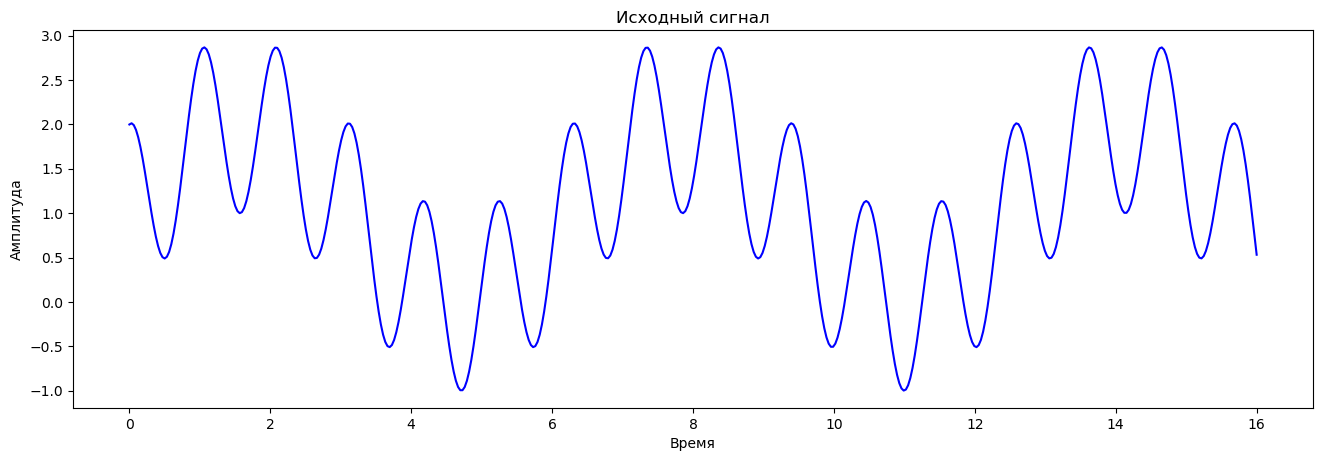

In [8]:
pointStart = 0
pointEnd = 16
countPoints = 512

manyX = np.linspace(pointStart,pointEnd,countPoints)
signal = mySignal(manyX)
signal_to_end = mySignal(manyX)

fig = plt.figure(figsize=(16, 5), dpi=100)

plt.plot(manyX, signal, color = 'blue')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')

### 1.2 Наложите шум на исходный сигнал

Наложите шум на сигнал, если $N // 2 != 0$, с равномерным законом распределения на интервале от $N \cdot [-0,1:0,1]$, иначе шум с нормальным законом распределения законом распределения у которого $\sigma = 0.2$. 

In [9]:
h = [0.1,0.12,0.14,0.3,0.12,0.2,0.2]

N = len(h)

def myNoise(N,manyX):
    res = []
    if N//2 != 0:
        res = np.random.uniform(N * -0.1, N * 0.1, len(manyX))
    else:
        res = np.random.normal(0, 0.2, len(manyX))
    return res

noise = myNoise(N,manyX)
y = mySignal(manyX) + myNoise(N,manyX)

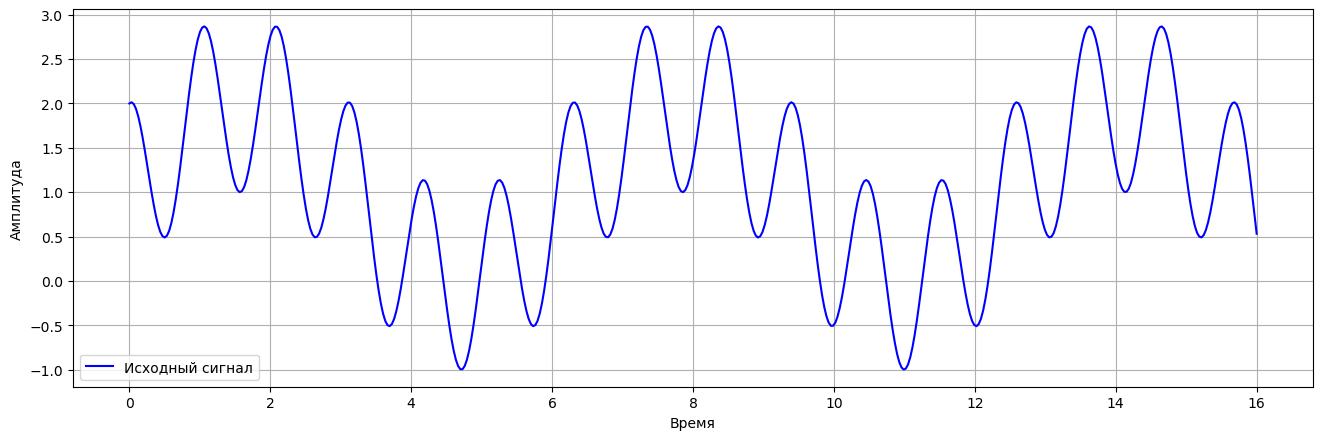

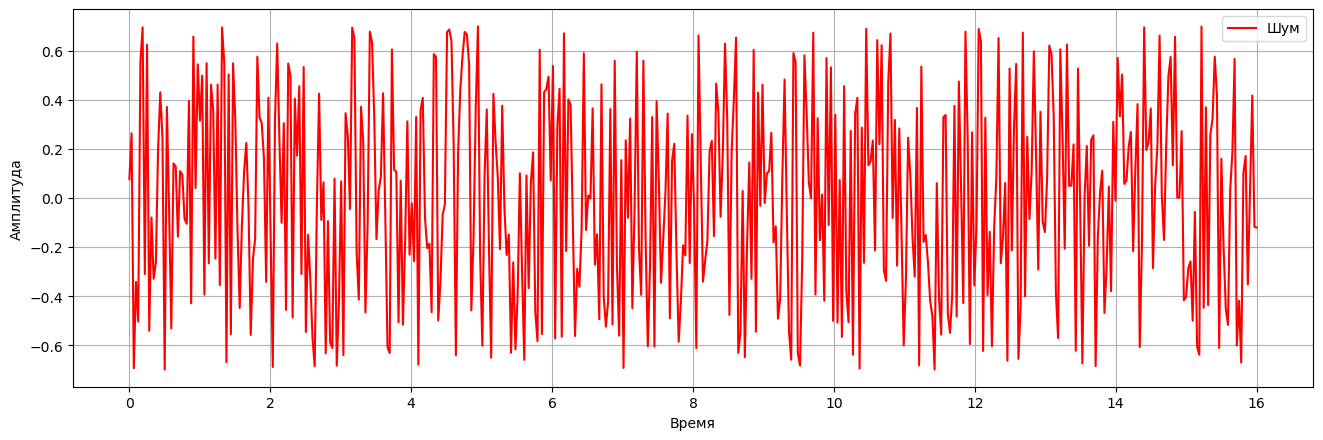

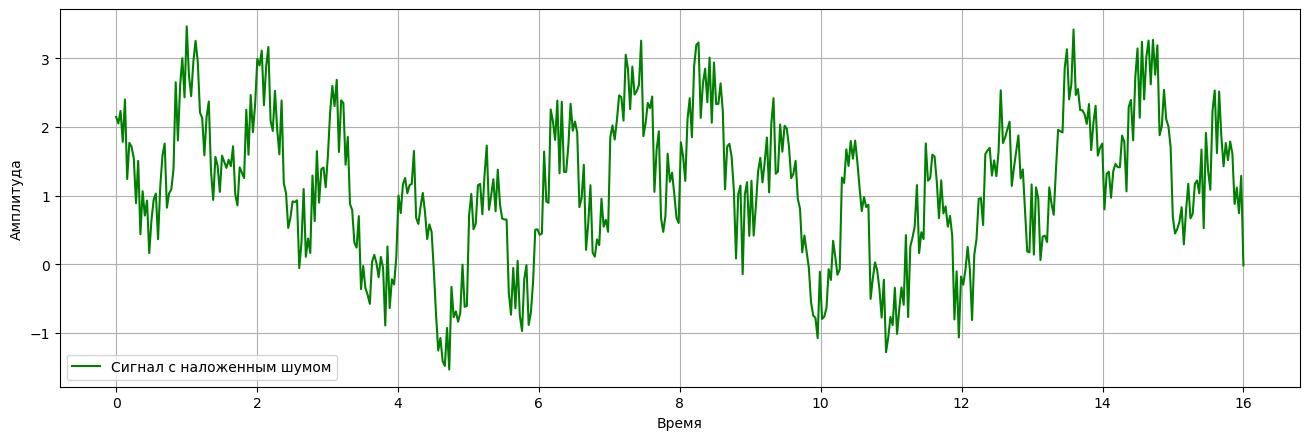

In [11]:
# Постройте исходный сигнал
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(manyX,signal,color = 'blue',label='Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

# Постройте шум
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(manyX,noise,color = 'red',label='Шум')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

# Постройте сигнал с наложенным на него шумом
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(manyX,y,color = 'green',label='Cигнал с наложенным шумом')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

## Задание 2 Реализовать низкочастотный фильтр

### 2.1 Написать функцию, реализующую низкочатстотный фильтр КИХ

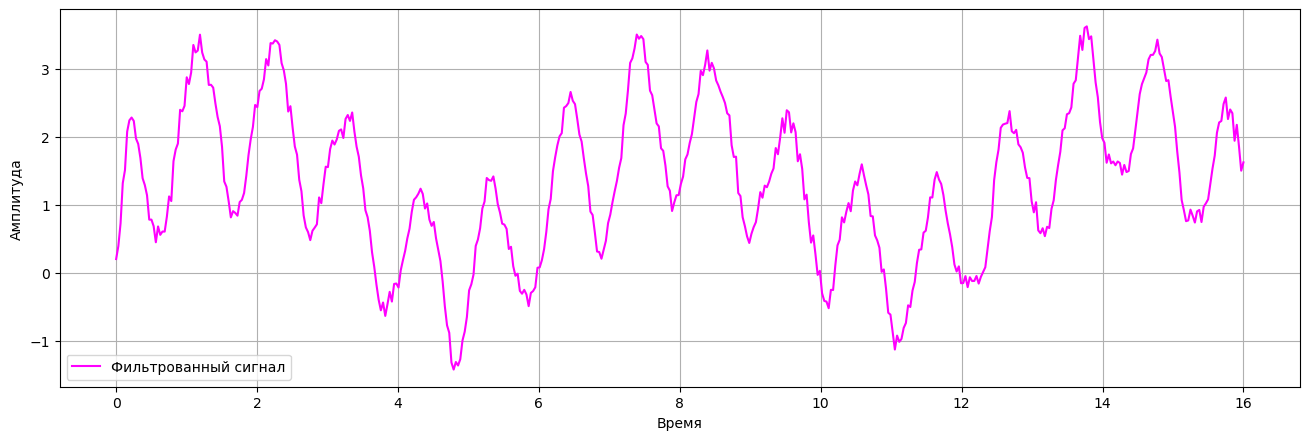

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

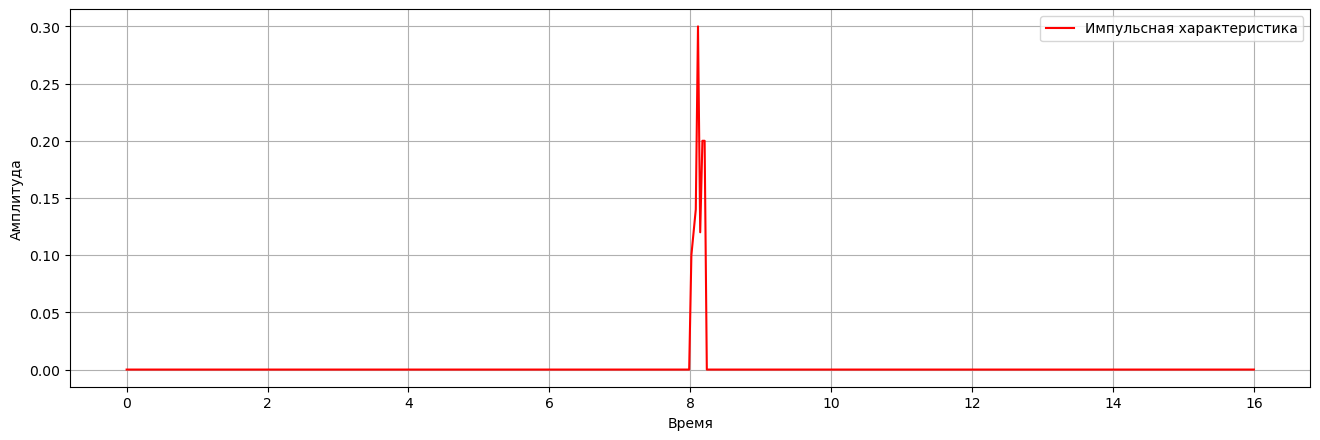

In [13]:
def LF_FIR(h,x):
    #countH = len(h)
    res = []
    for n in range(len(x)):
        Yn = 0
        for k in range(len(h)):
            if n>=k:
                Yn += h[k]*x[n-k]
        res.append(Yn)
    return res
            
signalWithNoise = mySignal(manyX) + myNoise(N,manyX)
reparedSignal = LF_FIR(h,signalWithNoise)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(manyX,reparedSignal,color = 'magenta',label='Фильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

impulseX = manyX
impulseY = []
for Nx in range(len(impulseX)):
    if Nx == len(impulseX) // 2:
        impulseY.append(1)
    else:
        impulseY.append(0)
impulseCharacter = LF_FIR(h,impulseY)
print(impulseCharacter)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(impulseX,impulseCharacter,color = 'red',label='Импульсная характеристика')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

### 2.2 Отобразите передаточную функцию НЧФ с КИХ

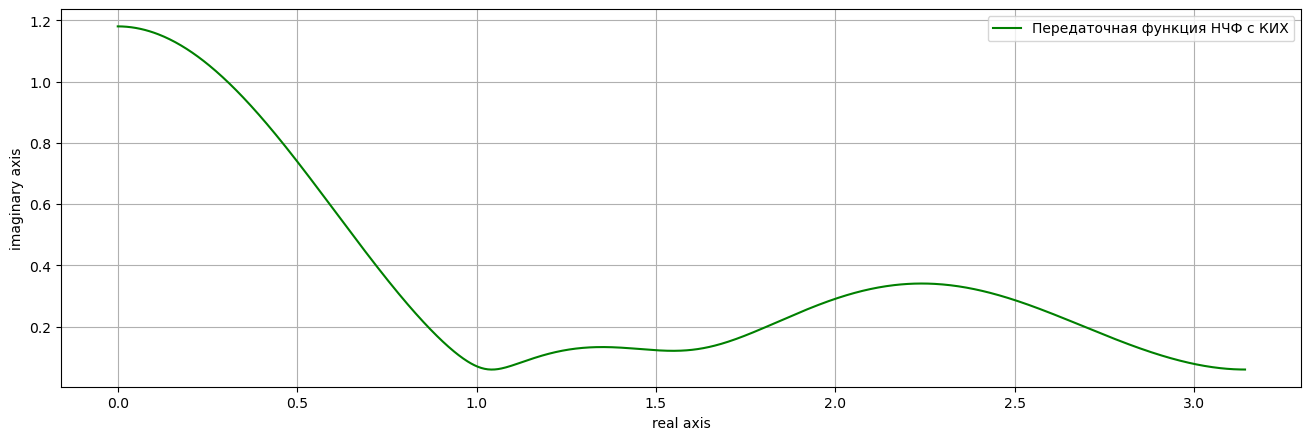

In [19]:
def Subordinate_FIR(manyW,h):
    res = []
    for w in manyW:
        summ = 0
        for k in range(len(h)):
            summ += h[k]*np.e**(-1j*w*k)
        res.append(abs(summ))
    return res
   
pointTransferX = np.linspace(0,np.pi,1000)
transfer = Subordinate_FIR(pointTransferX,h)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(pointTransferX,transfer,color = 'green',label='Передаточная функция НЧФ с КИХ')
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.grid()
plt.legend()
plt.show()

2.3 Написать функцию, реализующую низкочатстотный фильтр БИХ

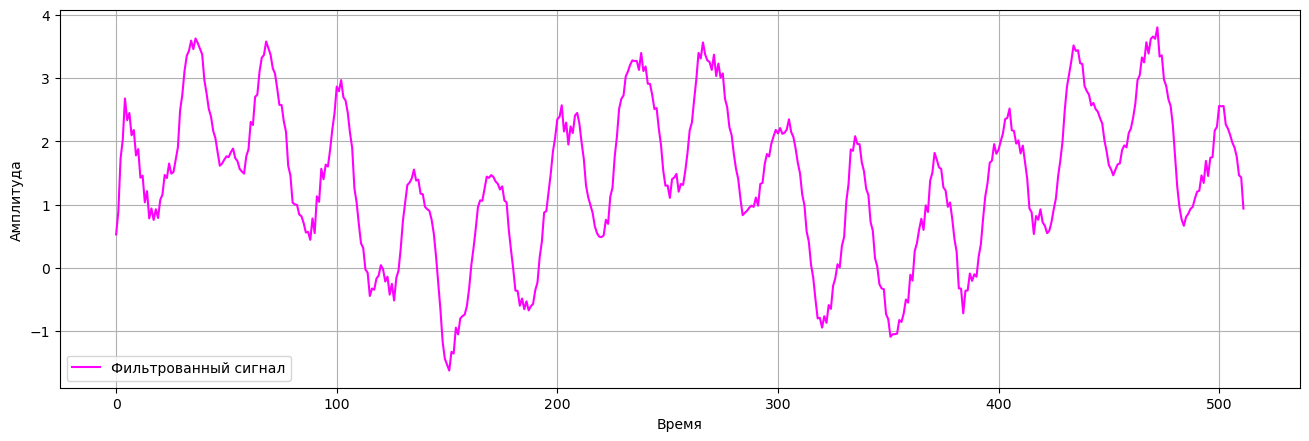

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

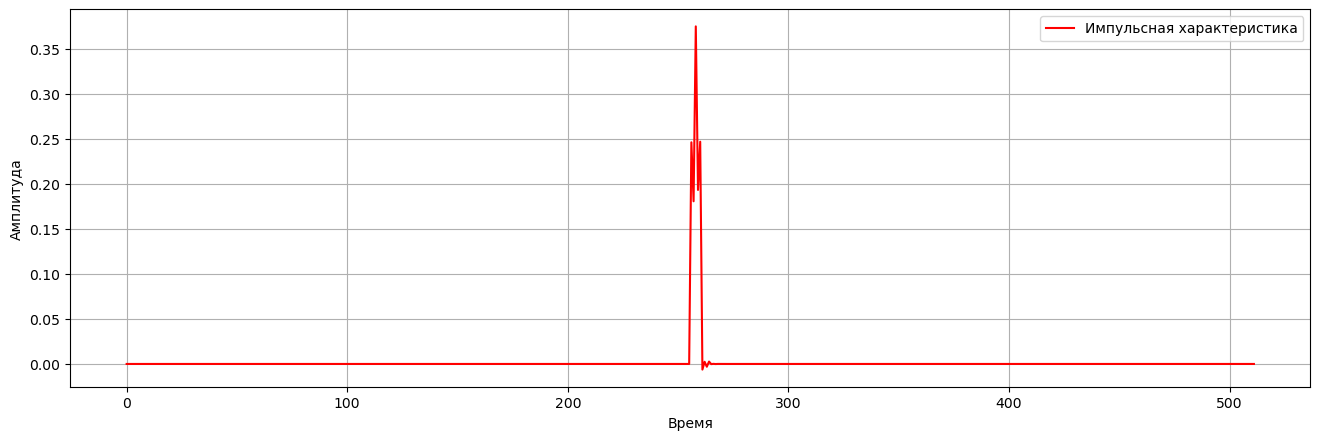

In [14]:
def LF_IIR(signal,A,B):
    res =[]
    for n in range(len(signal)):
        firstSum = 0
        secondSum = 0
        for k in range(len(B)):
            if (k<=n):
                firstSum += B[k]*signal[n-k]
        for k in range(1,len(A)):
            if (k<=n & len(res) != 0):
                secondSum += A[k-1]*res[n-k]
        res.append(firstSum - secondSum)  
    return res

A = [0.01,-0.01,0.02,-0.01,0.01]
B = [0.246,0.183,0.374,0.2,0.246]
signal = y
smothSignal = LF_IIR(signal,A,B)
predFunc = LF_IIR(impulseY,A,B)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(smothSignal,color = 'magenta',label='Фильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

print(predFunc)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(predFunc,color = 'red',label='Импульсная характеристика')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

### 2.4 Отобразите передаточную функцию НЧФ с БИХ

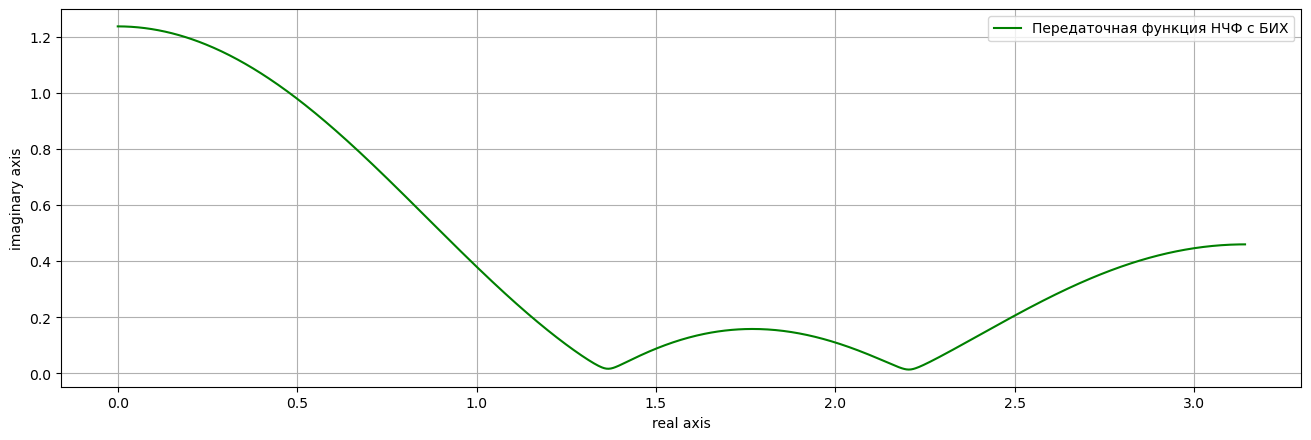

In [20]:
# код
def Subordinate_IIH(manyW,a,b):
    res = []
    for w in manyW:
        firstSumm = 0
        secondSumm = 1
        for k in range(len(b)):
            firstSumm += b[k]*np.e**(-1j*w*k)
        for k in range(1,len(a)):
            secondSumm += a[k]*np.e**(-1j*w*k)        
        res.append(abs(firstSumm / secondSumm))
    return res

pointTransferX_IIF = np.linspace(0,np.pi,1000)
transfer_IIF = Subordinate_IIH(pointTransferX_IIF,A,B)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(pointTransferX_IIF,transfer_IIF,color = 'green',label='Передаточная функция НЧФ с БИХ')
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.grid()
plt.legend()
plt.show()

## Задание 3 Реализовать высокочастотный фильтр 
### 3.1 Напишите функцию высокочастотного фильтра с КИХ

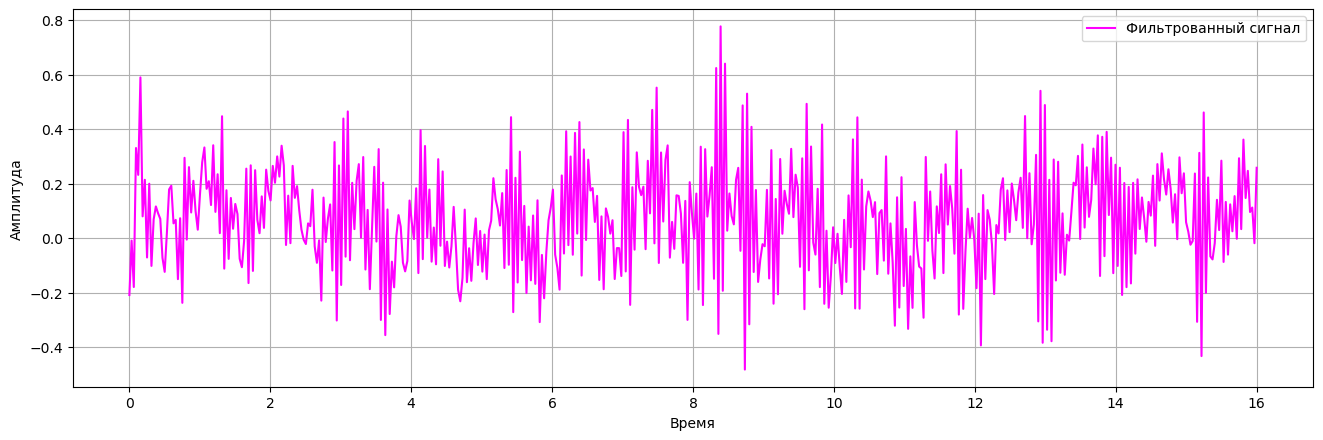

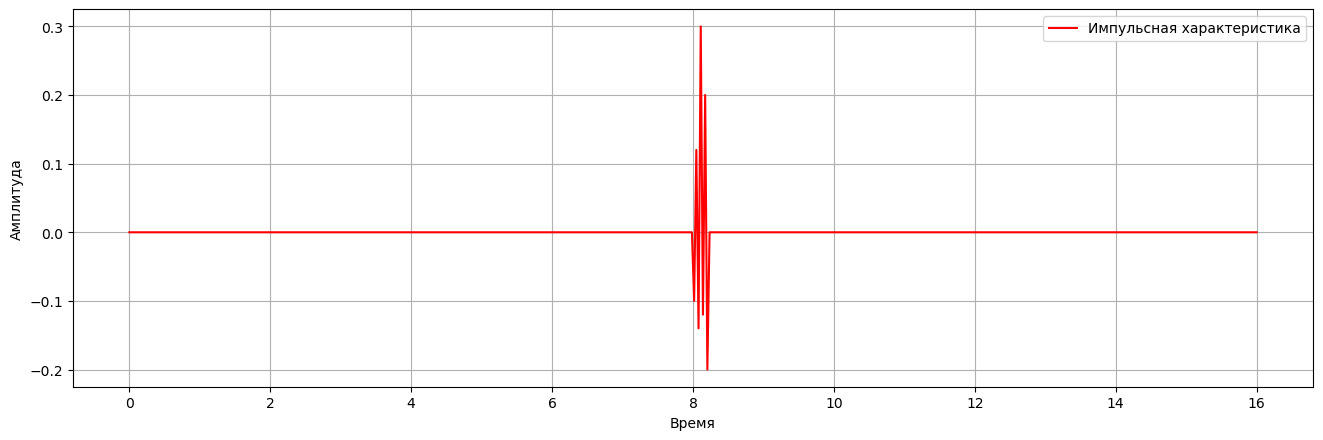

In [15]:
h_sec = [-0.1,0.12,-0.14,0.3,-0.12,0.2,-0.2]

def HF_FIR(h,x):
    countH = len(h)
    res = []
    for n in range(len(x)):
        Yn = 0
        for k in range(len(h)):
            if n>=k:
                Yn += h[k]*x[n-k]
        res.append(Yn)
    return res
            
signalWithNoise_sec = mySignal(manyX) + myNoise(N,manyX)
reparedSignal_sec = HF_FIR(h_sec,signalWithNoise_sec)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(manyX,reparedSignal_sec,color = 'magenta',label='Фильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

impulseX = manyX
impulseY = []
for Nx in range(len(impulseX)):
    if Nx == len(impulseX) // 2:
        impulseY.append(1)
    else:
        impulseY.append(0)
        
impulseCharacter = HF_FIR(h_sec,impulseY)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(impulseX,impulseCharacter,color = 'red',label='Импульсная характеристика')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

### 3.2 Отобразите передаточную функцию ВЧФ с КИХ

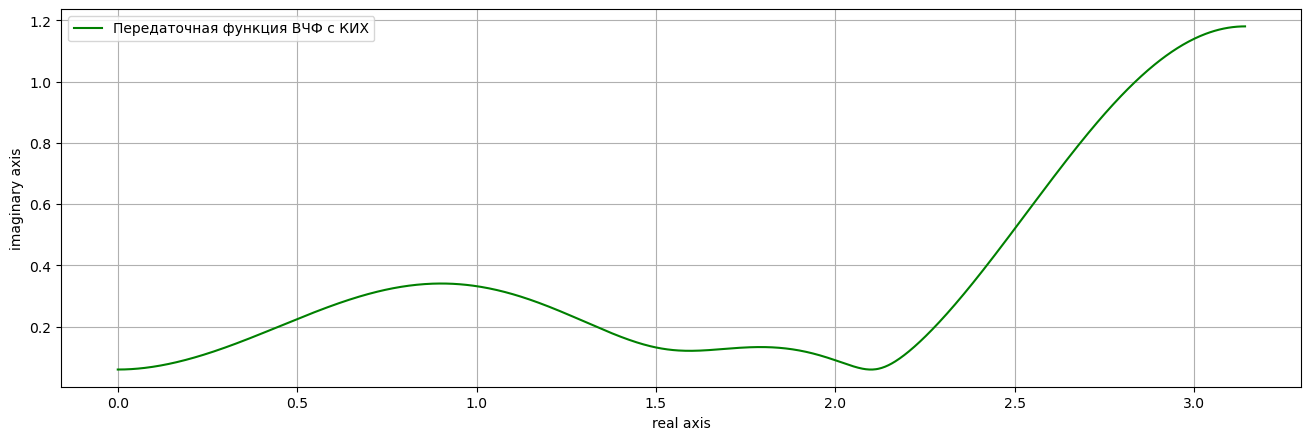

In [21]:
# код
pointTransferX = np.linspace(0,np.pi,1000)
transfer = Subordinate_FIR(pointTransferX,h_sec)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(pointTransferX,transfer,color = 'green',label='Передаточная функция ВЧФ с КИХ')
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.grid()
plt.legend()
plt.show()

### 3.3 Напишите функцию высокочастотного фильтра с БИХ

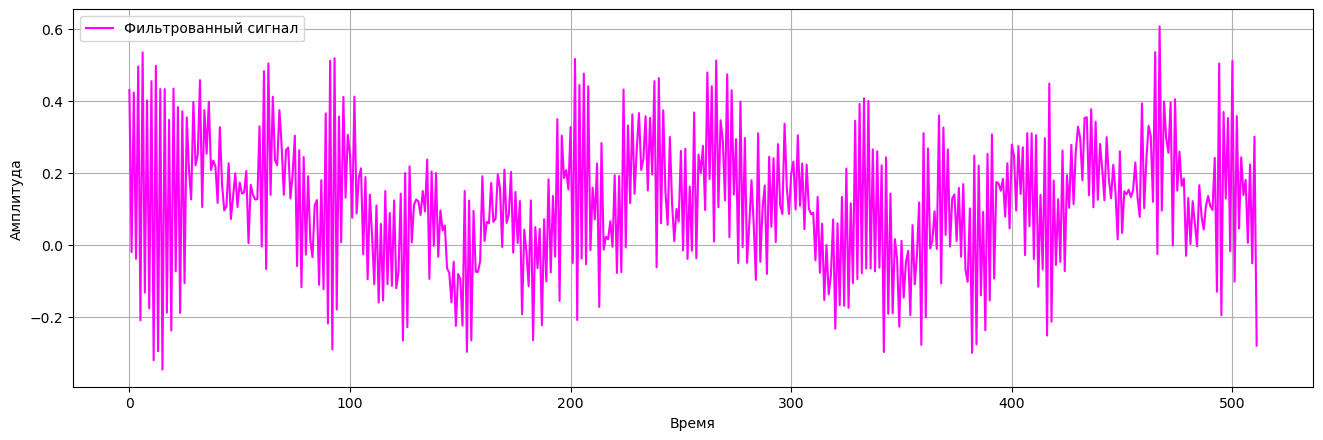

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

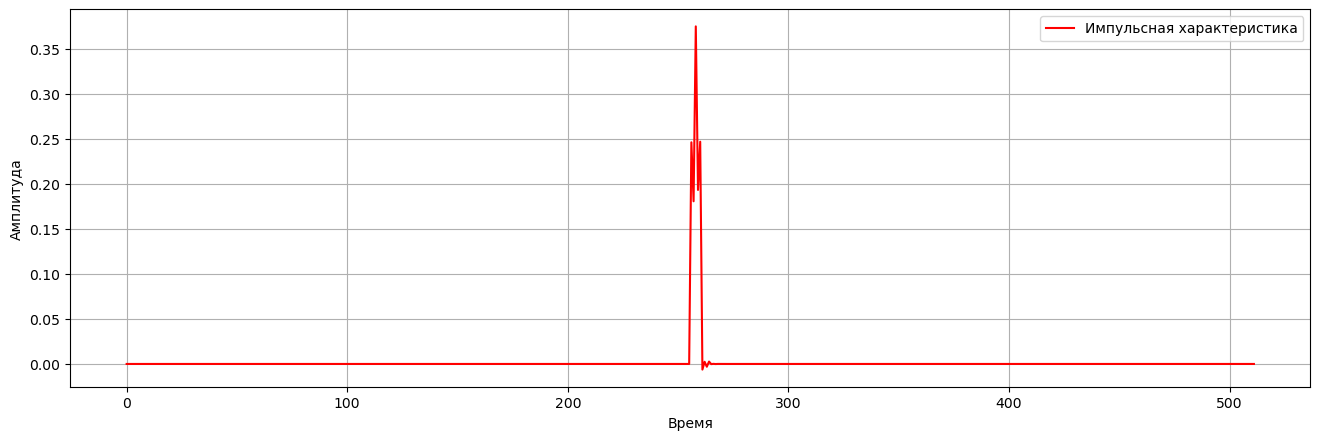

In [16]:
B1 = [0.2,-0.12267,0.0245837]
A1 = [0.3875837,-0.38867,0.35488]
signal1 = y
smothSignal1 = LF_IIR(signal1,A1,B1)
predFunc1 = LF_IIR(impulseY,A,B)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(smothSignal1,color = 'magenta',label='Фильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

print(predFunc1)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(predFunc1,color = 'red',label='Импульсная характеристика')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

### 3.4 Отобразите передаточную функцию ВЧФ с БИХ

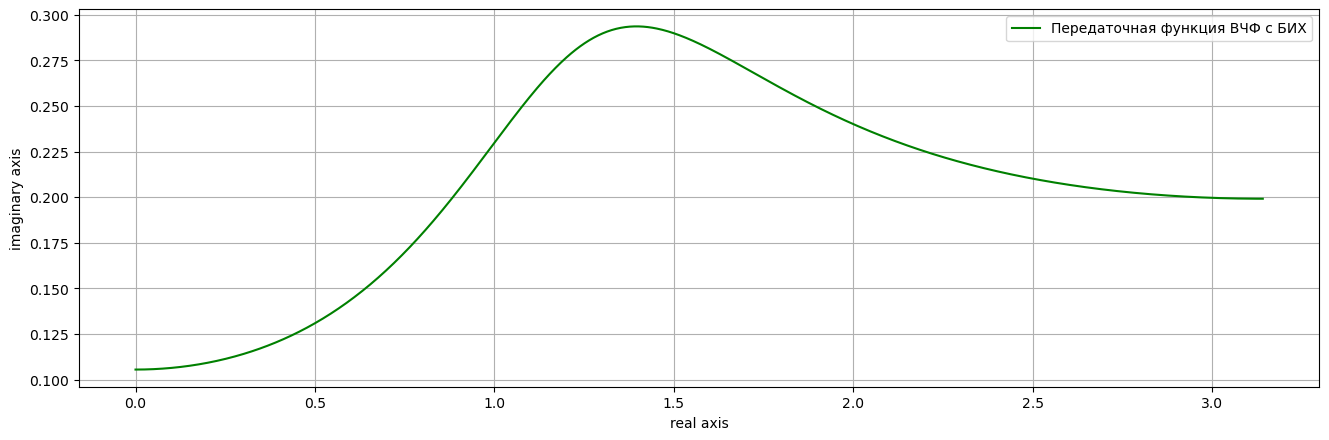

In [22]:
# код
pointTransferX_IIF1 = np.linspace(0,np.pi,1000)
transfer_IIF1 = Subordinate_IIH(pointTransferX_IIF1,A1,B1)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(pointTransferX_IIF1,transfer_IIF1,color = 'green',label='Передаточная функция ВЧФ с БИХ')
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.grid()
plt.legend()
plt.show()

## Задание 4 Применить фильтрацию к сигналу с шумом и сравнить результат визуально

В данном задании вам необходимо построить и проанализировать результат применения фильтрации к зашумленному сигналу.

На рисунке необходимо показать зашумленный сигнал, сигнал после фильрации и сигнал до наложения шума.

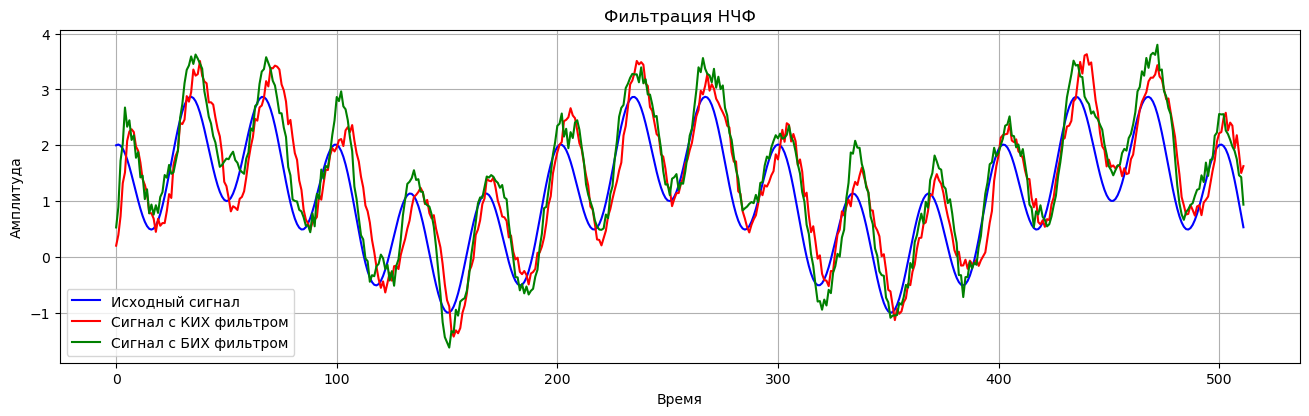

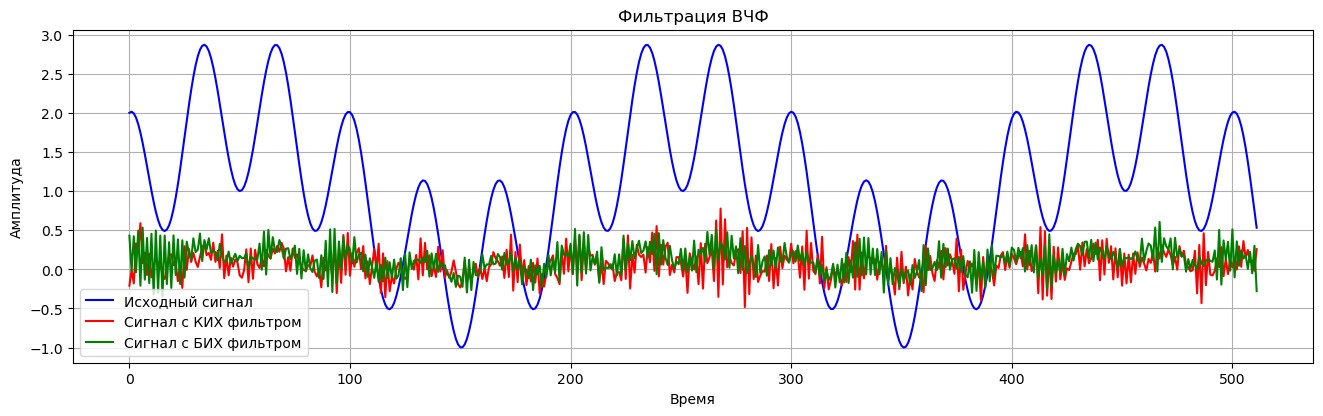

In [17]:
# код
fig = plt.figure(figsize=(16, 15), dpi=100)
plt.subplot(3,1,3)
plt.plot(signal_to_end,color = "blue",label='Исходный сигнал')
plt.plot(reparedSignal,color = "red",label='Сигнал с КИХ фильтром')
plt.plot(smothSignal,color = "green",label='Сигнал с БИХ фильтром')
plt.title('Фильтрация НЧФ')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid()

fig = plt.figure(figsize=(16, 15), dpi=100)
plt.subplot(3,1,3)
plt.plot(signal_to_end,color = "blue",label='Исходный сигнал')
plt.plot(reparedSignal_sec,color = "red",label='Сигнал с КИХ фильтром')
plt.plot(smothSignal1,color = "green",label='Сигнал с БИХ фильтром')
plt.title('Фильтрация ВЧФ')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid()

## Задание 5 Оценить полуенный результат математическим выражением

Для оценки качестав фильтраци необходимо:
* Вычислить разность фильтрованного сигнала $\hat{Y}$ и сигнала до наложения шума $Y$ для каждой точки.
* Вычислить выражение $\frac{1}{N}\sum^{N}_{i=1}(Y_i - \hat{Y}_i)^2$

In [15]:
def my_MSE(y,yf):
    N = len(y)
    summ = 0
    for i in range(N):
        summ += (y[i]-yf[i])**2
    #return np.sqrt(summ / N)
    return summ / N


kix = my_MSE(signal_to_end,reparedSignal)
bix = my_MSE(signal_to_end,smothSignal)


diff_in_points_kix = []
diff_in_points_bix = []

print("Разность в каждой точке для КИХ:")
for i in range(len(signal_to_end)):
    print("Точка ",i, " - ",signal_to_end[i] - reparedSignal[i])
    diff_in_points_kix.append(signal_to_end[i] - reparedSignal[i])

print()
print("Разность в каждой точке для БИХ:")
for i in range(len(signal_to_end)):
    print("Точка ",i, " - ",signal_to_end[i] - smothSignal[i])
    diff_in_points_kix.append(signal_to_end[i] - smothSignal[i])
    
print()

print("Дисперсия КИХ - ", kix)
print("Дисперсия БИХ - ", bix)

Разность в каждой точке для КИХ:
Точка  0  -  1.8131062043216402
Точка  1  -  1.5957517807100476
Точка  2  -  1.3267311870068843
Точка  3  -  0.731866843415399
Точка  4  -  0.4087251929871636
Точка  5  -  -0.05951488441227126
Точка  6  -  -0.5582736971432751
Точка  7  -  -0.6469537093580717
Точка  8  -  -0.7124181932211389
Точка  9  -  -0.7987943237833257
Точка  10  -  -0.7787040082413483
Точка  11  -  -0.8063795382477734
Точка  12  -  -0.7378733392081834
Точка  13  -  -0.550220627652074
Точка  14  -  -0.5482839048756541
Точка  15  -  -0.5399109719422709
Точка  16  -  -0.24969747845999846
Точка  17  -  -0.03799477237404225
Точка  18  -  -0.02198404209785787
Точка  19  -  0.19864098765170185
Точка  20  -  0.4540258445688816
Точка  21  -  0.3722067886721122
Точка  22  -  0.5685206464340603
Точка  23  -  0.551020813346037
Точка  24  -  0.3372930058126151
Точка  25  -  0.5331595818288664
Точка  26  -  0.28591590086726315
Точка  27  -  0.2941712202516602
Точка  28  -  0.22167212555249005
То

Точка  325  -  0.4328846549883203
Точка  326  -  0.4198322453779505
Точка  327  -  0.5125195573277592
Точка  328  -  0.23105817668697443
Точка  329  -  0.25082435021790694
Точка  330  -  -0.2601494291584696
Точка  331  -  0.007505492841998196
Точка  332  -  -0.28629388529138877
Точка  333  -  0.050806416950657685
Точка  334  -  -0.2862593612491602
Точка  335  -  -0.06230237695847762
Точка  336  -  -0.35183652802758036
Точка  337  -  -0.22045569864281722
Точка  338  -  -0.2769876251370893
Точка  339  -  -0.07427828377872081
Точка  340  -  0.10092399634996224
Точка  341  -  -0.19978722947003869
Точка  342  -  -0.21723469969772657
Точка  343  -  -0.5088941422633391
Точка  344  -  -0.3877802528207961
Точка  345  -  -0.47296898247036
Точка  346  -  -0.3640607624644617
Точка  347  -  -0.18598709768693267
Точка  348  -  -0.09718134546939816
Точка  349  -  0.15079062341307514
Точка  350  -  0.18877558808645278
Точка  351  -  0.2724180316527359
Точка  352  -  0.3841436380921732
Точка  353  -  0

Оцените спектры сигнала до и после фильтрации

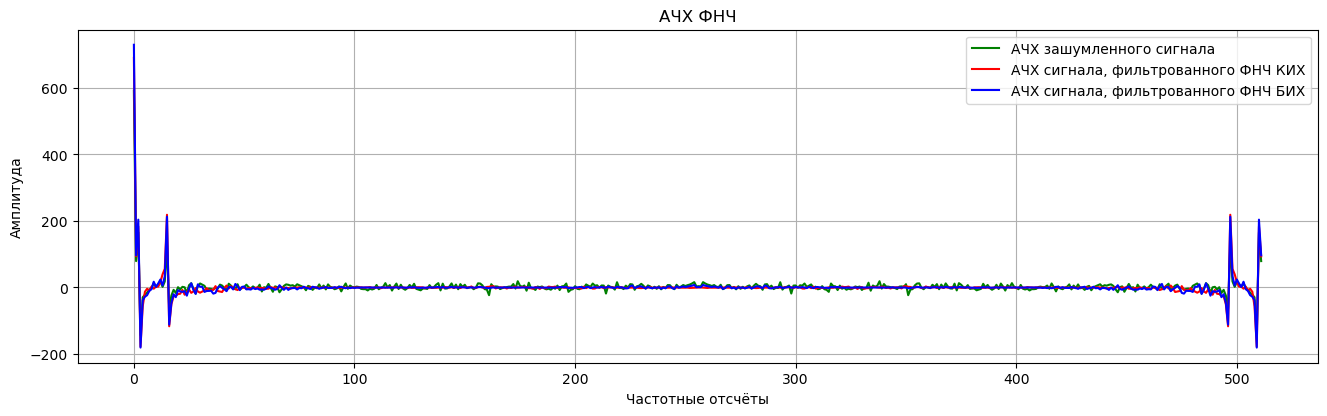

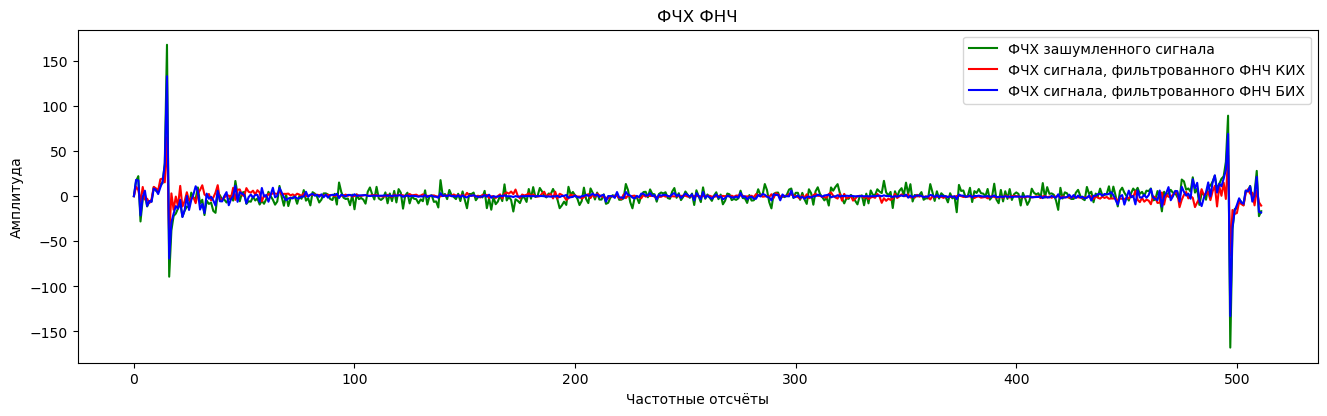

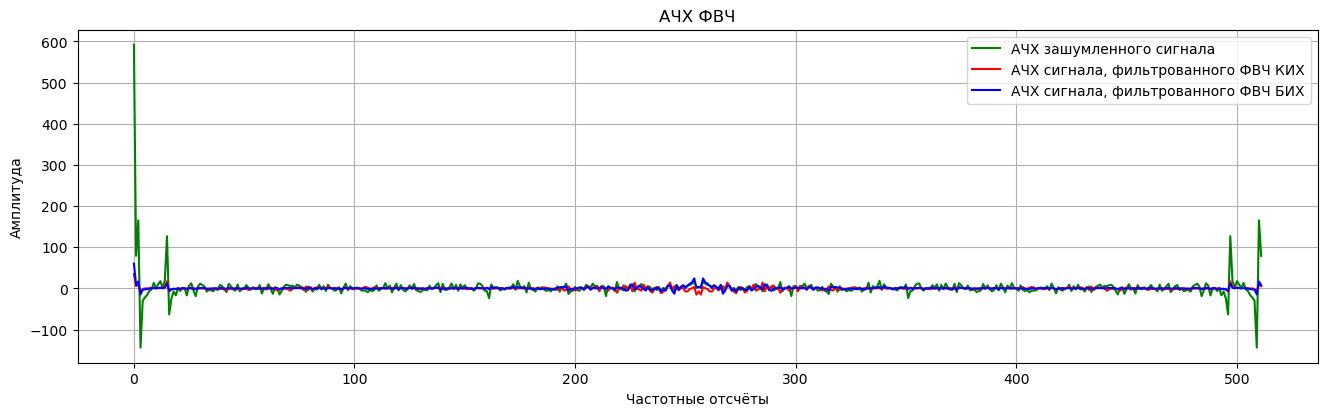

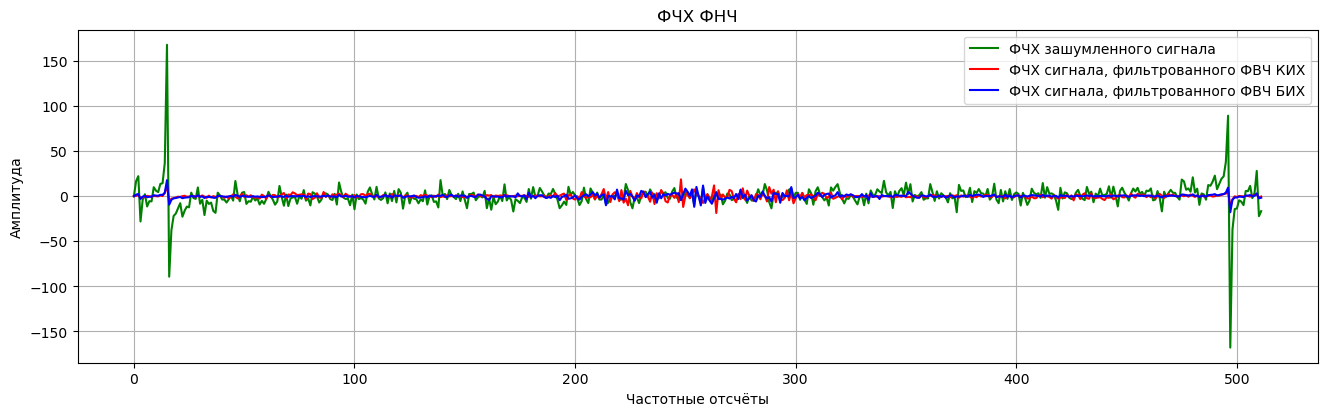

In [18]:
def Evaluate(x,v = "Imag"):
    newX = []
    for i in x:
        if v == "Imag":
            newX.append(i.real)
        elif v == "Real":
            newX.append(i.imag) 
        else:
            return 1
    return newX

noizedSignal = fft(y)
FNCh_KIX = fft(reparedSignal)
FNCh_BIX = fft(smothSignal)
FVCh_KIX = fft(reparedSignal_sec)
FVCh_BIX = fft(smothSignal1)

fig = plt.figure(figsize=(16, 15), dpi=100)
plt.subplot(3,1,3)
plt.plot(Evaluate(noizedSignal,"Imag"),color = "green",label='АЧХ зашумленного сигнала')
plt.plot(Evaluate(FNCh_KIX,"Imag"),color = "red",label='АЧХ сигнала, фильтрованного ФНЧ КИХ')
plt.plot(Evaluate(FNCh_BIX,"Imag"),color = "blue",label='АЧХ сигнала, фильтрованного ФНЧ БИХ')
plt.title('АЧХ ФНЧ')
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid()

fig = plt.figure(figsize=(16, 15), dpi=100)
plt.subplot(3,1,3)
plt.plot(Evaluate(noizedSignal,"Real"),color = "green",label='ФЧХ зашумленного сигнала')
plt.plot(Evaluate(FNCh_KIX,"Real"),color = "red",label='ФЧХ сигнала, фильтрованного ФНЧ КИХ')
plt.plot(Evaluate(FNCh_BIX,"Real"),color = "blue",label='ФЧХ сигнала, фильтрованного ФНЧ БИХ')
plt.title('ФЧХ ФНЧ')
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid()

plt.grid()
fig = plt.figure(figsize=(16, 15), dpi=100)
plt.subplot(3,1,3)
plt.plot(Evaluate(noizedSignal,"Imag"),color = "green",label='АЧХ зашумленного сигнала')
plt.plot(Evaluate(FVCh_KIX,"Imag"),color = "red",label='АЧХ сигнала, фильтрованного ФВЧ КИХ')
plt.plot(Evaluate(FVCh_BIX,"Imag"),color = "blue",label='АЧХ сигнала, фильтрованного ФВЧ БИХ')
plt.title('АЧХ ФВЧ')
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid()

fig = plt.figure(figsize=(16, 15), dpi=100)
plt.subplot(3,1,3)
plt.plot(Evaluate(noizedSignal,"Real"),color = "green",label='ФЧХ зашумленного сигнала')
plt.plot(Evaluate(FVCh_KIX,"Real"),color = "red",label='ФЧХ сигнала, фильтрованного ФВЧ КИХ')
plt.plot(Evaluate(FVCh_BIX,"Real"),color = "blue",label='ФЧХ сигнала, фильтрованного ФВЧ БИХ')
plt.title('ФЧХ ФНЧ')
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid()

### Ответьте на вопросы:

1. Как можно отличить БИХ и КИХ фильры?
2. Какие ФЧХ могут иметь БИХ фильтры?
3. Какие ФЧХ могут иметь КИХ фильтры?
4. Какие фильтры устойчивые, БИХ или КИХ?
5. Что такое передаточная функция?


ответ:

1. Главное отличие КИХ и БИХ фильтров заключается в наличии или отсутствия обратной связи (когда на вход устройства подаётся сигнал, пропорциональный сигналу на его выходе. Таким образом, значение выходного сигнала БИХ-фильтра зависит не только от текущего и предыдущего значения входного сигнала, но и от предыдущего значения выходного сигнала). Например, при программной реализации БИХ фильтра возникала необходимость использовать раннее полученные значения для расчета последующих.

2. БИХ фильтры могут иметь нелинейную ФЧХ ((ФЧХ гарантированно нелинейная).

3. КИХ фильтры могут иметь линейную ФЧХ (ФЧХ гарантированно линейная).

4. КИХ фильтры более устойчивы, так как имеют конечную импульсную характеристику (линейная цепь как прототип).

5. Передаточная функция - это функция, которая описывает связь между входным и выходным (результирующим) сигналами. Особенность передаточной функции в том, что зная ее и вход сигнала можно рассчитать и выход сигнала.

## Выводы по работе

1. При выполнении данной лабораторной работы были рассмотрены алгоритмы работы различных цифровых фильтров: ФНЧ КИХ, ФНЧ БИХ, ФВЧ КИХ, ФВЧ БИХ. Проведен анализ результатов применения данных фильтров на предложенном сигнале, проведена визуальная оценка применения фильтрации к сигналу с шумом.

2. ФЧ КИХ: требует расчета одного массива коэффициентов, имеет конечную импульсную характеристику, реализуется без обратной связи.

3. ФЧ БИХ - требует расчета двух массивов коэффициентов, имеет бесконечную импульсную характеристику, реализуется с обратной связью.

4. ФНЧ и ФВЧ в обоих случаях могут быть получены путем изменения коэффициентов уже реализованных фильтров.